In [2]:
## This notebook will be used to draw comparisons between environmental maps and their matched reference (DMSO) control

In [1]:
## Import modules

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import joypy


In [2]:
## Import gene and sgrna interaction data

singles_table = pd.read_excel('/Users/benh/Desktop/GI_data/singles_tables/singles_table.xlsx',index_col = 0)

dmso2_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/dmso2_map.xlsx',index_col = 0)
dmso2_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/dmso2_sgmap.xlsx', index_col = 0)

etop_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/etop_map.xlsx',index_col = 0)
etop_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/etop_sgmap.xlsx', index_col = 0)

keto_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/keto_map.xlsx',index_col = 0)
keto_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/keto_sgmap.xlsx', index_col = 0)
keto_map = keto_map.fillna(0)

## Original experiment maps
dmso1_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/dmso1_map.xlsx',index_col = 0)
dmso1_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/dmso1_sgmap.xlsx',index_col = 0)

atr_map = pd.read_excel('/Users/benh/Desktop/GI_data/gene_maps/atr_map.xlsx',index_col = 0)
atr_sgmap = pd.read_excel('/Users/benh/Desktop/GI_data/guide_maps/atr_sgmap.xlsx',index_col = 0)



In [3]:
## Define Functions here

##Import Max's handy upperTriangle function to avoid counting AB BA GIs twice
def upperTriangle(matrix, k=1):
    keep = np.triu(np.ones(matrix.shape), k=k).astype('bool').reshape(matrix.size)
    return matrix.stack(dropna=False).loc[keep]

def get_interactors(gimap,thresh):
    pos_list = []
    neg_list = []
    out_list = []
    for i in range(len(gimap.index)):
        for j in range(i+1,len(gimap.index)):
            pair = gimap.index[i]+':'+gimap.index[j]
            score = gimap.iloc[i,j]
            if abs(score) > thresh:
                out_list.append(pair)
            if score > thresh:
                pos_list.append(pair)
            if score < -thresh:
                neg_list.append(pair)
    return out_list, pos_list, neg_list

def pairs2score(in_list,in_map):
    out_list = []
    for item in in_list:
        g1,g2 = item.split(':')
        out_list.append(in_map.loc[g1,g2])
    return out_list

def plot_gi_rho(gimap, thresh, t_singles,ut_singles): 
    num_gis = []
    single_rho = []
    for gene in gimap.index:
        num_gis.append(len([val for val in gimap[gene] if abs(val) > thresh]))
        tau = t_singles.loc[gene_singlestable['gene']== gene]['b.mean'].mean()
        gamma = ut_singles.loc[gene_singlestable['gene']== gene]['b.mean'].mean()
        single_rho.append(tau-gamma)
    return plt.scatter(single_rho,num_gis,s=2,color = 'dimgray')

## A color map from Max Horlbeck in his 14.33 notebook for drawing GI heatmaps in the traditional blue/yellow scheme

cdict = {'red':((0.0,0.125,0.125),
                (0.5,0.0,0.0),
                (1.0,0.957,0.957)),
        'green':((0.0,0.713,0.713),
                (0.5,0.0,0.0),
                (1.0,0.918,0.918)),
        'blue': ((0.0,0.886,0.886),
                (0.5,0.0,0.0),
                (1.0,0.094,0.094))}
blue_yellow = matplotlib.colors.LinearSegmentedColormap('BlueYellow',cdict)
blue_yellow.set_bad('w')

plt.register_cmap(cmap=blue_yellow)

/var/folders/wk/hds_px4x4qg3m4rvxqhrb0wm0000gp/T/ipykernel_36270/2216097798.py:55: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=blue_yellow)


In [4]:
## Fill nan values in the map with zeros

dmso1_map = dmso1_map.fillna(0)
atr_map = atr_map.fillna(0)
dmso2_map = dmso2_map.fillna(0)
etop_map = etop_map.fillna(0)
keto_map = keto_map.fillna(0)

dmso1_sgmap = dmso1_sgmap.fillna(0)
atr_sgmap = atr_sgmap.fillna(0)
dmso2_sgmap = dmso2_sgmap.fillna(0)
etop_sgmap = etop_sgmap.fillna(0)
keto_sgmap = keto_sgmap.fillna(0)

In [5]:
## Make gene-sgneg map subsets

dmso2_geneneg = dmso2_sgmap.loc[singles_table['gene'] == 'non-targeting',
               :].groupby(singles_table['gene'],axis=1).mean()

etop_geneneg = etop_sgmap.loc[singles_table['gene'] == 'non-targeting',
               :].groupby(singles_table['gene'],axis=1).mean()

keto_geneneg = keto_sgmap.loc[singles_table['gene'] == 'non-targeting',
               :].groupby(singles_table['gene'],axis=1).mean()

dmso1_geneneg = dmso1_sgmap.loc[singles_table['gene'] == 'non-targeting',
               :].groupby(singles_table['gene'],axis=1).mean()

atr_geneneg = atr_sgmap.loc[singles_table['gene'] == 'non-targeting',
               :].groupby(singles_table['gene'],axis=1).mean()


In [6]:
## Repave all gene-ntc maps based off the index from one of the gene level maps

dmso1_geneneg = dmso1_geneneg.loc[:,dmso1_map.index]
atr_geneneg = atr_geneneg.loc[:,dmso1_map.index]
dmso2_geneneg = dmso2_geneneg.loc[:,dmso1_map.index]
etop_geneneg = etop_geneneg.loc[:,dmso1_map.index]
keto_geneneg = keto_geneneg.loc[:,dmso1_map.index]

In [7]:
## Define significance thresholds for each map at four times the standard deviation of the gene-ntc distribution

dmso1_thresh = np.hstack(dmso1_geneneg.values).std()*4
atr_thresh = np.hstack(atr_geneneg.values).std()*4
dmso2_thresh = np.hstack(dmso2_geneneg.values).std()*4
etop_thresh = np.hstack(etop_geneneg.values).std()*4
keto_thresh = np.hstack(keto_geneneg.values).std()*4

In [8]:
## Use the "get_interactors" functions to define lists of threshold passed interactors in each map

dmso1_all,dmso1_pos,dmso1_neg = get_interactors(dmso1_map,dmso1_thresh)
atr_all,atr_pos,atr_neg = get_interactors(atr_map,atr_thresh)
dmso2_all,dmso2_pos,dmso2_neg = get_interactors(dmso2_map,dmso2_thresh)
etop_all,etop_pos,etop_neg = get_interactors(etop_map,etop_thresh)
keto_all,keto_pos,keto_neg = get_interactors(keto_map,keto_thresh)

In [9]:
## Make difference matrices for both gene level and gene-ntc 

dmso_di_map = dmso1_map - dmso2_map
atr_di_map = atr_map - dmso1_map
etop_di_map = etop_map - dmso2_map
keto_di_map = keto_map - dmso2_map

dmso_di_geneneg = dmso1_geneneg - dmso2_geneneg
atr_di_geneneg = atr_geneneg - dmso1_geneneg
etop_di_geneneg = etop_geneneg - dmso2_geneneg
keto_di_geneneg = keto_geneneg - dmso2_geneneg

In [10]:
## Write differential matrices

dmso_di_map.to_excel('/Users/benh/Desktop/GI_data/gene_maps/dmso_di_map.xlsx')
atr_di_map.to_excel('/Users/benh/Desktop/GI_data/gene_maps/atr_di_map.xlsx')
etop_di_map.to_excel('/Users/benh/Desktop/GI_data/gene_maps/etop_di_map.xlsx')
keto_di_map.to_excel('/Users/benh/Desktop/GI_data/gene_maps/keto_di_map.xlsx')

In [10]:
## Define di map thresholds for significance at five times the standard deviation of the gene-ntc distribution

dmso_di_thresh = np.hstack(dmso_di_geneneg.values).std()*5
atr_di_thresh = np.hstack(atr_di_geneneg.values).std()*5
etop_di_thresh = np.hstack(etop_di_geneneg.values).std()*5
keto_di_thresh = np.hstack(keto_di_geneneg.values).std()*5

In [11]:
## Calculate threshold passed differential interactors
dmso_di_all, dmso_di_pos, dmso_di_neg = get_interactors(dmso_di_map,dmso_di_thresh)
atr_di_all, atr_di_pos, atr_di_neg = get_interactors(atr_di_map,atr_di_thresh)
etop_di_all, etop_di_pos, etop_di_neg = get_interactors(etop_di_map,etop_di_thresh)
keto_di_all, keto_di_pos, keto_di_neg = get_interactors(keto_di_map,keto_di_thresh)

## Remove interactions if they're not called in EITHER map
dmso_di_pos = [item for item in dmso_di_pos if item in dmso1_pos or item in dmso2_neg]
dmso_di_neg = [item for item in dmso_di_neg if item in dmso1_neg or item in dmso2_pos]

atr_di_pos = [item for item in atr_di_pos if item in atr_pos or item in dmso1_neg]
atr_di_neg = [item for item in atr_di_neg if item in atr_neg or item in dmso1_pos]

etop_di_pos = [item for item in etop_di_pos if item in etop_pos or item in dmso2_neg]
etop_di_neg = [item for item in etop_di_neg if item in etop_neg or item in dmso2_pos]

keto_di_pos = [item for item in keto_di_pos if item in keto_pos or item in dmso2_neg]
keto_di_neg = [item for item in keto_di_neg if item in keto_neg or item in dmso2_pos]



In [12]:
len(atr_di_neg)

454

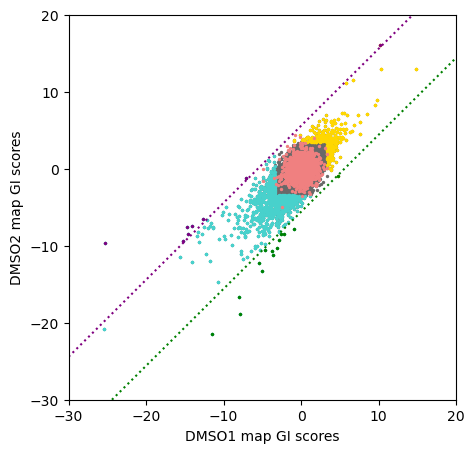

In [13]:
## Plot GI scores for DMSO versus the dmso2
#pp2a_genes = ['PPP2R1A','PPP2R2A','VPS29']
plt.figure(figsize=(5,5))
plt.scatter(upperTriangle(dmso2_map),upperTriangle(dmso1_map),s=2,color='dimgray')

plt.scatter(pairs2score(dmso1_pos,dmso2_map),pairs2score(dmso1_pos,dmso1_map),s=2,color = 'gold')
plt.scatter(pairs2score(dmso2_pos,dmso2_map),pairs2score(dmso2_pos,dmso1_map),s=2,color = 'gold')
#plt.scatter(pairs2score(dmso1_dmso2_pos_shared,dmso_map2),pairs2score(dmso1_dmso2_pos_shared,dmso2_map),s=2,color = 'goldenrod')

plt.scatter(pairs2score(dmso1_neg,dmso2_map),pairs2score(dmso1_neg,dmso1_map),s=2,color = 'mediumturquoise')
plt.scatter(pairs2score(dmso2_neg,dmso2_map),pairs2score(dmso2_neg,dmso1_map),s=2,color = 'mediumturquoise')
#plt.scatter(pairs2score(dmso1_dmso2_neg_shared,dmso_map2),pairs2score(dmso1_dmso2_neg_shared,dmso2_map),s=2,color = 'dodgerblue')

plt.scatter(pairs2score(dmso_di_pos,dmso2_map),pairs2score(dmso_di_pos,dmso1_map),s=2, color = 'purple')
plt.scatter(pairs2score(dmso_di_neg,dmso2_map),pairs2score(dmso_di_neg,dmso1_map),s=2, color = 'green')

#plt.scatter(np.hstack(dmso_map2.loc[pp2a_genes,:].values),np.hstack(dmso2_map.loc[pp2a_genes,:].values),s=5,c = 'cyan',label = 'PP2A')
plt.scatter(np.hstack(dmso2_geneneg.values),np.hstack(dmso1_geneneg.values),s=2,c='lightcoral',label = 'gene-sgneg')

plt.plot((-30,(20-dmso_di_thresh)),((-30+dmso_di_thresh),20),':',color='purple')
plt.plot(((-30+dmso_di_thresh),20),(-30,(20-dmso_di_thresh)),':',color='green')

#plt.plot((-30,20),(0,0),color = 'black')
#plt.plot((0,0),(-30,20),color = 'black')
plt.xlim(-30,20)
plt.ylim(-30,20)


plt.xlabel('DMSO1 map GI scores')
plt.ylabel('DMSO2 map GI scores')
#plt.legend()
#plt.savefig('/Users/benh/Desktop/for_figs/dmso1-dmso2_scatter.png',dpi=300)


In [49]:
stats.pearsonr(upperTriangle(dmso1_map),upperTriangle(dmso2_map))[0]

0.6904363561627784

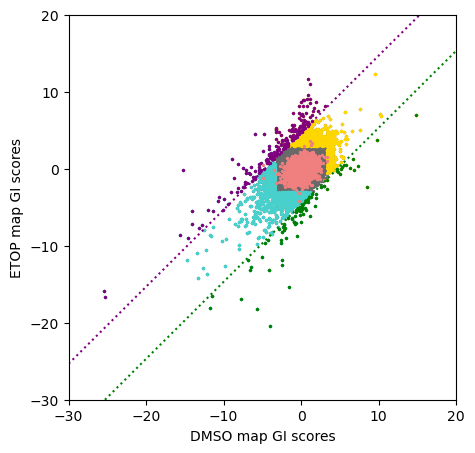

In [24]:
## Plot GI scores for DMSO versus the ETOP
#pp2a_genes = ['PPP2R1A','PPP2R2A','VPS29']
plt.figure(figsize=(5,5))
plt.scatter(upperTriangle(dmso2_map),upperTriangle(etop_map),s=2,color='dimgray')

plt.scatter(pairs2score(dmso2_pos,dmso2_map),pairs2score(dmso2_pos,etop_map),s=2,color = 'gold')
plt.scatter(pairs2score(etop_pos,dmso2_map),pairs2score(etop_pos,etop_map),s=2,color = 'gold')
#plt.scatter(pairs2score(dmso2_etop_pos_shared,dmso_map2),pairs2score(dmso2_etop_pos_shared,etop_map),s=2,color = 'goldenrod')

plt.scatter(pairs2score(dmso2_neg,dmso2_map),pairs2score(dmso2_neg,etop_map),s=2,color = 'mediumturquoise')
plt.scatter(pairs2score(etop_neg,dmso2_map),pairs2score(etop_neg,etop_map),s=2,color = 'mediumturquoise')
#plt.scatter(pairs2score(dmso2_etop_neg_shared,dmso_map2),pairs2score(dmso2_etop_neg_shared,etop_map),s=2,color = 'dodgerblue')

plt.scatter(pairs2score(etop_di_pos,dmso2_map),pairs2score(etop_di_pos,etop_map),s=2, color = 'purple')
plt.scatter(pairs2score(etop_di_neg,dmso2_map),pairs2score(etop_di_neg,etop_map),s=2, color = 'green')

#plt.scatter(np.hstack(dmso_map2.loc[pp2a_genes,:].values),np.hstack(etop_map.loc[pp2a_genes,:].values),s=5,c = 'cyan',label = 'PP2A')
plt.scatter(np.hstack(dmso2_geneneg.values),np.hstack(etop_geneneg.values),s=2,c='lightcoral',label = 'gene-sgneg')

plt.plot((-30,(20-etop_di_thresh)),((-30+etop_di_thresh),20),':',color='purple')
plt.plot(((-30+etop_di_thresh),20),(-30,(20-etop_di_thresh)),':',color='green')

#plt.plot((-30,20),(0,0),color = 'black')
#plt.plot((0,0),(-30,20),color = 'black')
plt.xlim(-30,20)
plt.ylim(-30,20)


plt.xlabel('DMSO map GI scores')
plt.ylabel('ETOP map GI scores')
#plt.legend()
plt.savefig('/Users/benh/Desktop/for_figs/dmso2-etop_scatter.png',dpi=300)



In [43]:
stats.pearsonr(upperTriangle(dmso2_map),upperTriangle(etop_map))[0]

0.4855113686819549

In [14]:
pp2a_genes = ['PPP2R1A','PPP2R2A']
pp2a_int = []
for gene in etop_di_map.columns:
    if abs(etop_di_map.loc[pp2a_genes[0],gene]) > etop_di_thresh:
        pp2a_int.append(pp2a_genes[0]+':'+gene)
    if abs(etop_di_map.loc[pp2a_genes[1],gene]) > etop_di_thresh:
        pp2a_int.append(pp2a_genes[1]+':'+gene)



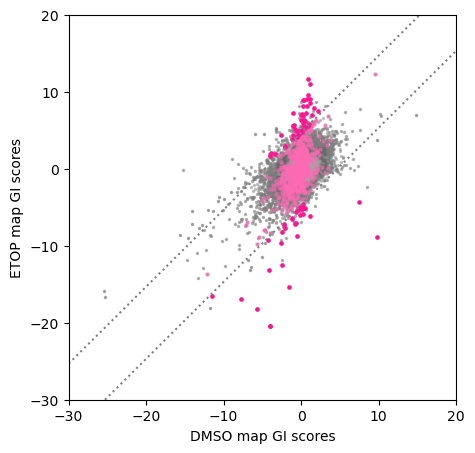

In [27]:
## Plot GI scores for DMSO versus the ETOP

plt.figure(figsize=(5,5))
plt.scatter(upperTriangle(dmso2_map),upperTriangle(etop_map),s=2,color='dimgray',alpha = 0.2)

plt.scatter(pairs2score(dmso2_pos,dmso2_map),pairs2score(dmso2_pos,etop_map),s=2,color = 'grey',alpha = 0.2)
plt.scatter(pairs2score(etop_pos,dmso2_map),pairs2score(etop_pos,etop_map),s=2,color = 'grey',alpha = 0.2)

plt.scatter(pairs2score(dmso2_neg,dmso2_map),pairs2score(dmso2_neg,etop_map),s=2,color = 'grey',alpha = 0.2)
plt.scatter(pairs2score(etop_neg,dmso2_map),pairs2score(etop_neg,etop_map),s=2,color = 'grey',alpha = 0.2)

plt.scatter(pairs2score(etop_di_pos,dmso2_map),pairs2score(etop_di_pos,etop_map),s=2, color = 'grey',alpha = 0.2)
plt.scatter(pairs2score(etop_di_neg,dmso2_map),pairs2score(etop_di_neg,etop_map),s=2, color = 'grey',alpha = 0.2)

plt.scatter(np.hstack(dmso2_geneneg.values),np.hstack(etop_geneneg.values),s=2,c='darkgray',label = 'gene-sgneg',alpha=0.2)
plt.scatter(np.hstack(dmso2_map.loc[pp2a_genes,:].values),np.hstack(etop_map.loc[pp2a_genes,:].values),s=5,color = 'hotpink',label = 'PP2A',alpha = 0.5)
plt.scatter(pairs2score(pp2a_int,dmso2_map),
            pairs2score(pp2a_int,etop_map),
            s=5,color = 'deeppink',label = 'PP2A')

plt.plot((-30,(20-etop_di_thresh)),((-30+etop_di_thresh),20),':',color='gray')
plt.plot(((-30+etop_di_thresh),20),(-30,(20-etop_di_thresh)),':',color='gray')

#plt.plot((-30,20),(0,0),color = 'black')
#plt.plot((0,0),(-30,20),color = 'black')
plt.xlim(-30,20)
plt.ylim(-30,20)


plt.xlabel('DMSO map GI scores')
plt.ylabel('ETOP map GI scores')
#plt.legend()
plt.savefig('/Users/benh/Desktop/for_figs/dmso2-etop_scatter_pp2a.png',dpi=300)



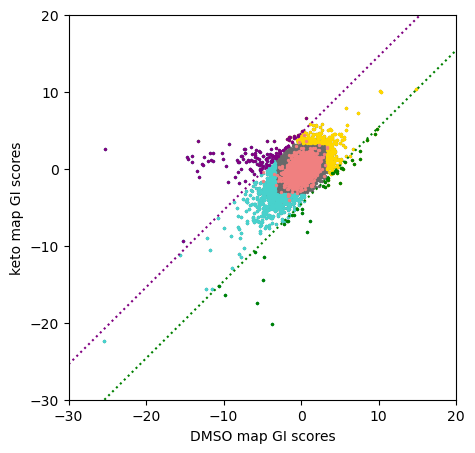

In [28]:
## Plot GI scores for DMSO versus the keto
#gly_genes = ['GPI','HK2','ENO1','XPO4']
plt.figure(figsize=(5,5))
plt.scatter(upperTriangle(dmso2_map),upperTriangle(keto_map),s=2,color='dimgray')

plt.scatter(pairs2score(dmso2_pos,dmso2_map),pairs2score(dmso2_pos,keto_map),s=2,color = 'gold')
plt.scatter(pairs2score(keto_pos,dmso2_map),pairs2score(keto_pos,keto_map),s=2,color = 'gold')
#plt.scatter(pairs2score(dmso2_keto_pos_shared,dmso2_map),pairs2score(dmso2_keto_pos_shared,keto_map),s=2,color = 'goldenrod')

plt.scatter(pairs2score(dmso2_neg,dmso2_map),pairs2score(dmso2_neg,keto_map),s=2,color = 'mediumturquoise')
plt.scatter(pairs2score(keto_neg,dmso2_map),pairs2score(keto_neg,keto_map),s=2,color = 'mediumturquoise')
#plt.scatter(pairs2score(dmso2_keto_neg_shared,dmso2_map),pairs2score(dmso2_keto_neg_shared,keto_map),s=2,color = 'dodgerblue')

plt.scatter(pairs2score(keto_di_pos,dmso2_map),pairs2score(keto_di_pos,keto_map),s=2, color = 'purple')
plt.scatter(pairs2score(keto_di_neg,dmso2_map),pairs2score(keto_di_neg,keto_map),s=2, color = 'green')

#plt.scatter(np.hstack(dmso2_map.loc[gly_genes,:].values),np.hstack(keto_map.loc[gly_genes,:].values),s=5,c = 'deeppink',label = 'pp2a')
plt.scatter(np.hstack(dmso2_geneneg.values),np.hstack(keto_geneneg.values),s=2,c='lightcoral',label = 'gene-sgneg')

plt.plot((-30,(20-keto_di_thresh)),((-30+keto_di_thresh),20),':',color='purple')
plt.plot(((-30+keto_di_thresh),20),(-30,(20-keto_di_thresh)),':',color='green')

#plt.plot((-30,20),(0,0),color = 'black')
#plt.plot((0,0),(-30,20),color = 'black')
plt.xlim(-30,20)
plt.ylim(-30,20)


plt.xlabel('DMSO map GI scores')
plt.ylabel('keto map GI scores')
#plt.legend()
plt.savefig('/Users/benh/Desktop/for_figs/dmso2_keto_scatter.png',dpi=300)



In [42]:
stats.pearsonr(upperTriangle(dmso2_map),upperTriangle(keto_map))[0]

0.540604149154154

In [15]:
gly_genes = ['GPI','HK2','ENO1','XPO4']
gly_int = []
for gene in keto_di_map.columns:
    if abs(keto_di_map.loc[gly_genes[0],gene]) > keto_di_thresh:
        gly_int.append(gly_genes[0]+':'+gene)
    if abs(keto_di_map.loc[gly_genes[1],gene]) > keto_di_thresh:
        gly_int.append(gly_genes[1]+':'+gene)
    if abs(keto_di_map.loc[gly_genes[2],gene]) > keto_di_thresh:
        gly_int.append(gly_genes[2]+':'+gene)
    if abs(keto_di_map.loc[gly_genes[3],gene]) > keto_di_thresh:
        gly_int.append(gly_genes[3]+':'+gene)


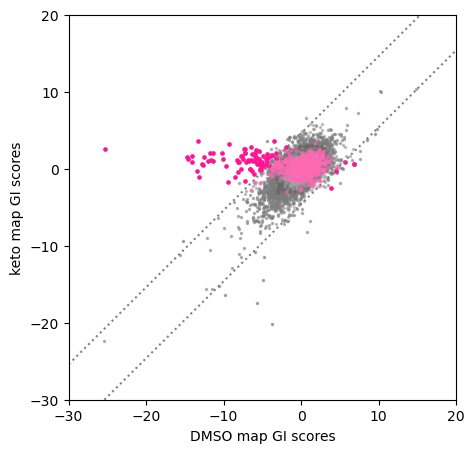

In [30]:
## Plot GI scores for DMSO versus the keto
gly_genes = ['GPI','HK2','ENO1','XPO4']
plt.figure(figsize=(5,5))
plt.scatter(upperTriangle(dmso2_map),upperTriangle(keto_map),s=2,color='dimgray',alpha=0.2)

plt.scatter(pairs2score(dmso2_pos,dmso2_map),pairs2score(dmso2_pos,keto_map),s=2,color = 'gray',alpha=0.2)
plt.scatter(pairs2score(keto_pos,dmso2_map),pairs2score(keto_pos,keto_map),s=2,color = 'gray',alpha=0.2)

plt.scatter(pairs2score(dmso2_neg,dmso2_map),pairs2score(dmso2_neg,keto_map),s=2,color = 'gray',alpha=0.2)
plt.scatter(pairs2score(keto_neg,dmso2_map),pairs2score(keto_neg,keto_map),s=2,color = 'gray',alpha=0.2)

plt.scatter(pairs2score(keto_di_pos,dmso2_map),pairs2score(keto_di_pos,keto_map),s=2, color = 'gray',alpha=0.2)
plt.scatter(pairs2score(keto_di_neg,dmso2_map),pairs2score(keto_di_neg,keto_map),s=2, color = 'gray',alpha=0.2)

plt.scatter(np.hstack(dmso2_geneneg.values),np.hstack(keto_geneneg.values),s=2,c='darkgray',label = 'gene-sgneg',alpha=0.2)
plt.scatter(np.hstack(dmso2_map.loc[gly_genes,:].values),np.hstack(keto_map.loc[gly_genes,:].values),s=5,c = 'hotpink',label = 'gly',alpha = 0.5)
plt.scatter(pairs2score(gly_int,dmso2_map),
            pairs2score(gly_int,keto_map),
            s=5,color = 'deeppink',label = 'PP2A')

plt.plot((-30,(20-keto_di_thresh)),((-30+keto_di_thresh),20),':',color='gray')
plt.plot(((-30+keto_di_thresh),20),(-30,(20-keto_di_thresh)),':',color='gray')

#plt.plot((-30,20),(0,0),color = 'black')
#plt.plot((0,0),(-30,20),color = 'black')
plt.xlim(-30,20)
plt.ylim(-30,20)


plt.xlabel('DMSO map GI scores')
plt.ylabel('keto map GI scores')
#plt.legend()
plt.savefig('/Users/benh/Desktop/for_figs/dmso2-keto_scatter_gly.png',dpi=300)



Text(0, 0.5, 'ATR map GI scores')

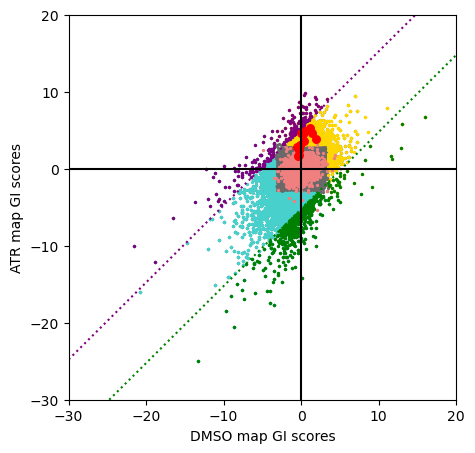

In [182]:
## Plot GI scores for DMSO versus the keto

plt.figure(figsize=(5,5))
plt.scatter(upperTriangle(dmso1_map),upperTriangle(atr_map),s=2,color='dimgray')

plt.scatter(pairs2score(atr_pos,dmso1_map),pairs2score(atr_pos,atr_map),s=2,color = 'gold')
plt.scatter(pairs2score(dmso1_pos,dmso1_map),pairs2score(dmso1_pos,atr_map),s=2,color = 'gold')
#plt.scatter(pairs2score(dmso1_atr_pos_shared,dmso1_map),pairs2score(dmso1_atr_pos_shared,atr_map),s=2,color = 'goldenrod')

plt.scatter(pairs2score(atr_neg,dmso1_map),pairs2score(atr_neg,atr_map),s=2,color = 'mediumturquoise')
plt.scatter(pairs2score(dmso1_neg,dmso1_map),pairs2score(dmso1_neg,atr_map),s=2,color = 'mediumturquoise')
#plt.scatter(pairs2score(dmso1_atr_neg_shared,dmso1_map),pairs2score(dmso1_atr_neg_shared,atr_map),s=2,color = 'dodgerblue')

plt.scatter(pairs2score(atr_di_pos,dmso1_map),pairs2score(atr_di_pos,atr_map),s=2, color = 'purple')
plt.scatter(pairs2score(atr_di_neg,dmso1_map),pairs2score(atr_di_neg,atr_map),s=2, color = 'green')


## plot gene-neg control distribution
plt.scatter(np.hstack(dmso1_geneneg.values),np.hstack(atr_geneneg.values),s=2,c='lightcoral',label = 'gene-sgneg')
plt.scatter(dmso1_map.loc[set1,set2],atr_map.loc[set1,set2],s=30,color='red')
plt.plot((-30,(20-atr_di_thresh)),((-30+atr_di_thresh),20),':',color='purple')
plt.plot(((-30+atr_di_thresh),20),(-30,(20-atr_di_thresh)),':',color='green')


plt.plot((-30,20),(0,0),color = 'black')
plt.plot((0,0),(-30,20),color = 'black')
plt.xlim(-30,20)
plt.ylim(-30,20)

plt.xlabel('DMSO map GI scores')
plt.ylabel('ATR map GI scores')
#plt. legend()
#plt.savefig('/Users/benh/Desktop/for_figs/dmso1-atr_scatter.png',dpi=300)



In [16]:
tip60_genes = ['BRD8','TRRAP','DMAP1','MEAF6','EP400']
tip60_int = []
for gene in atr_di_map.columns:
    if abs(atr_di_map.loc[tip60_genes[0],gene]) > atr_di_thresh:
        tip60_int.append(tip60_genes[0]+':'+gene)
    if abs(atr_di_map.loc[tip60_genes[1],gene]) > atr_di_thresh:
        tip60_int.append(tip60_genes[1]+':'+gene)
    if abs(atr_di_map.loc[tip60_genes[2],gene]) > atr_di_thresh:
        tip60_int.append(tip60_genes[2]+':'+gene)
    if abs(atr_di_map.loc[tip60_genes[3],gene]) > atr_di_thresh:
        tip60_int.append(tip60_genes[3]+':'+gene)
    if abs(atr_di_map.loc[tip60_genes[4],gene]) > atr_di_thresh:
        tip60_int.append(tip60_genes[4]+':'+gene)

In [41]:
stats.pearsonr(upperTriangle(dmso1_map),upperTriangle(atr_map))[0]

0.4241238840668434

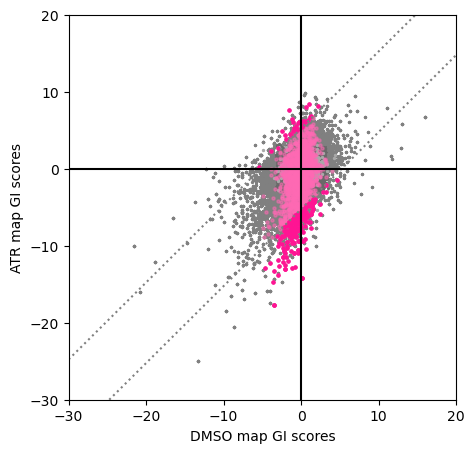

In [56]:
## Plot GI scores for DMSO versus the keto

plt.figure(figsize=(5,5))
plt.scatter(upperTriangle(dmso1_map),upperTriangle(atr_map),s=2,color='dimgray')

plt.scatter(pairs2score(atr_pos,dmso1_map),pairs2score(atr_pos,atr_map),s=2,color = 'grey')
plt.scatter(pairs2score(dmso1_pos,dmso1_map),pairs2score(dmso1_pos,atr_map),s=2,color = 'grey')

plt.scatter(pairs2score(atr_neg,dmso1_map),pairs2score(atr_neg,atr_map),s=2,color = 'grey')
plt.scatter(pairs2score(dmso1_neg,dmso1_map),pairs2score(dmso1_neg,atr_map),s=2,color = 'grey')

plt.scatter(pairs2score(atr_di_pos,dmso1_map),pairs2score(atr_di_pos,atr_map),s=2, color = 'grey')
plt.scatter(pairs2score(atr_di_neg,dmso1_map),pairs2score(atr_di_neg,atr_map),s=2, color = 'grey')

## plot gene-neg control distribution
plt.scatter(np.hstack(dmso1_geneneg.values),np.hstack(atr_geneneg.values),s=2,c='darkgrey',label = 'gene-sgneg')

plt.scatter(np.hstack(dmso1_map.loc[tip60_genes,:].values),np.hstack(atr_map.loc[tip60_genes,:].values),s=5,c = 'hotpink',label = 'tip60',alpha = 0.5)
plt.scatter(pairs2score(tip60_int,dmso1_map),
            pairs2score(tip60_int,atr_map),
            s=5,color = 'deeppink',label = 'tip60')


plt.plot((-30,(20-atr_di_thresh)),((-30+atr_di_thresh),20),':',color='grey')
plt.plot(((-30+atr_di_thresh),20),(-30,(20-atr_di_thresh)),':',color='grey')


plt.plot((-30,20),(0,0),color = 'black')
plt.plot((0,0),(-30,20),color = 'black')
plt.xlim(-30,20)
plt.ylim(-30,20)

plt.xlabel('DMSO map GI scores')
plt.ylabel('ATR map GI scores')
#plt. legend()
plt.savefig('/Users/benh/Desktop/for_figs/dmso1-atr_scatter_tip60.png',dpi=300)



In [11]:
#etop_di_map.to_excel('/Users/benh/Desktop/UCSF_Tetrad_Program/Gilbert_Lab/gi2/gi2_differential/etop_di_map.xlsx')
#keto_di_map.to_excel('/Users/benh/Desktop/UCSF_Tetrad_Program/Gilbert_Lab/gi2/gi2_differential/keto_di_map.xlsx')

In [19]:
etop_di_all, etop_di_pos, etop_di_neg = get_interactors(etop_di_map, etop_di_thresh)
keto_di_all, keto_di_pos, keto_di_neg = get_interactors(keto_di_map, keto_di_thresh)
atr_di_all, atr_di_pos, atr_di_neg = get_interactors(atr_di_map, atr_di_thresh)

In [20]:
print(len(etop_di_all), len(keto_di_all), len(atr_di_all))

285 166 665


In [178]:
diffColors(0)

(0.3693064312883143, 0.6698168277807458, 0.4716448206096863, 1.0)

In [46]:
## A color map for the difference map specifically

diffColors = sns.diverging_palette(139,288,s= 63, l=64, center="dark", as_cmap=True)
diffColors2 = sns.diverging_palette(139,288,s= 100, l=64, center="dark", as_cmap=True)

In [102]:
set1 = ['PPP2R1A','PPP2R2A']
set2 = ['KTI12','CTU2','ELP4']

In [116]:
gimap = dmso2_map
diff = False

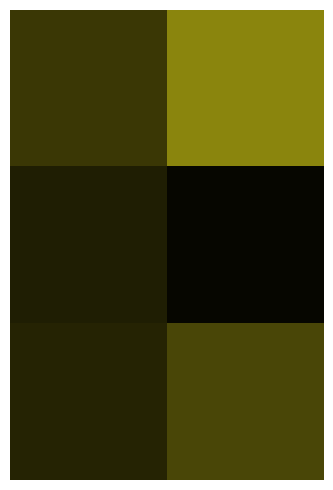

In [120]:
fig, axis = plt.subplots(figsize=(5,5))
# gs = plt.GridSpec(1,3, width_ratios=(.5,5,.5))

# axis = plt.subplot(gs[0])
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_visible(False)
axis.spines['bottom'].set_visible(False)
axis.yaxis.set_tick_params(left='off', right='off', labelsize='8')
axis.xaxis.set_tick_params(bottom='off', top='off', labelsize='8')
if diff == False:
    im = axis.imshow(gimap.loc[set2,set1], interpolation = 'none', cmap=blue_yellow, vmin=-4, vmax=4)
if diff == True:
    im = axis.imshow(gimap.loc[set2,set1], interpolation = 'none', cmap=diffColors, vmin=-4, vmax=4)
axis.set_xticks([])
axis.set_yticks([])

#axis.set_xlim((-50, 130))
#axis.set_ylim((130,-10))

# plt.colorbar(mappable=im, ax=plt.subplot(gs[2]), shrink=0.5)
plt.tight_layout()
#plt.savefig('/Users/benh/Desktop/for_figs/pp2a-v-wobble_dmso2.png',dpi=200)

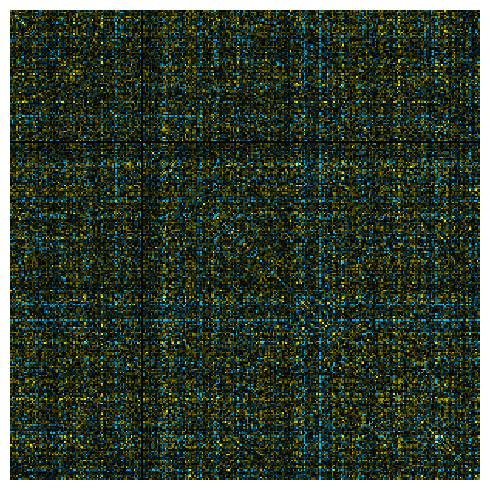

In [12]:
fig, axis = plt.subplots(figsize=(5,5))
# gs = plt.GridSpec(1,3, width_ratios=(.5,5,.5))

# axis = plt.subplot(gs[0])
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_visible(False)
axis.spines['bottom'].set_visible(False)
axis.yaxis.set_tick_params(left='off', right='off', labelsize='8')
axis.xaxis.set_tick_params(bottom='off', top='off', labelsize='8')
im = axis.imshow(dmso1_map, interpolation = 'none', cmap=blue_yellow, vmin=-4, vmax=4)

axis.set_xticks([])
axis.set_yticks([])

#axis.set_xlim((-50, 130))
#axis.set_ylim((130,-10))

# plt.colorbar(mappable=im, ax=plt.subplot(gs[2]), shrink=0.5)
plt.tight_layout()
#plt.savefig('/Users/benh/Desktop/for_figs/pp2a-v-wobble_dmso2.png',dpi=200)

In [115]:
test_df = pd.DataFrame(index = range(len(upperTriangle(dmso1_map).values)))
test_df['dmso1'] = upperTriangle(dmso1_map).values
test_df['atr'] = upperTriangle(atr_map).values
test_df['dmso2'] = upperTriangle(dmso2_map).values
test_df['etop'] = upperTriangle(etop_map).values
test_df['keto'] = upperTriangle(keto_map).values

In [43]:
## Make a matrix of all GI, eGI, and dGI scores for the ATR comparison 

## first, make a list of all unique paired guide data
doubles_index = []
gi_list = []
egi_list = []
dgi_list = []
tip60_list = []
for i in range(len(dmso1_map.index)):
    for j in range(i+1,len(dmso1_map.index)):
        g1 = dmso1_map.index[i]
        g2 = dmso1_map.index[j]
        doubles_index.append(g1+':'+g2)
        gi_list.append(abs(dmso1_map.iloc[i,j]))
        egi_list.append(abs(atr_map.iloc[i,j]))
        dgi_list.append(abs(atr_di_map.iloc[i,j]))
        if g1 in tip60_genes or g2 in tip60_genes:
            tip60_list.append(True)
        if g1 not in tip60_genes and g2 not in tip60_genes:
            tip60_list.append(False)
            


In [44]:
atr_score_matrix = pd.DataFrame(index = doubles_index)
atr_score_matrix['dmso1'] = gi_list
atr_score_matrix['atr'] = egi_list
atr_score_matrix['atr_di'] = dgi_list
atr_score_matrix['tip60'] = tip60_list

In [45]:
doubles_index_lf = []
scores_lf = []
tip60_lf= []
gimap_lf = []
for i in range(len(doubles_index)):
    doubles_index_lf.append(doubles_index[i]+'_dmso')
    doubles_index_lf.append(doubles_index[i]+'_atr')
    scores_lf.append(atr_score_matrix.iloc[i,0])
    scores_lf.append(atr_score_matrix.iloc[i,1])
    tip60_lf.append(atr_score_matrix.iloc[i,3])
    tip60_lf.append(atr_score_matrix.iloc[i,3])
    gimap_lf.append('dmso')
    gimap_lf.append('atr')

In [46]:
atr_score_lf = pd.DataFrame(index = doubles_index_lf)
atr_score_lf['score'] = scores_lf
atr_score_lf['tip60'] = tip60_lf
atr_score_lf['gimap'] = gimap_lf

In [50]:
atr_score_lf

,score,tip60,gimap
H2AFX:NONO_dmso,0.467194,False,dmso
H2AFX:NONO_atr,0.348300,False,atr
H2AFX:CDC25A_dmso,1.148423,False,dmso
H2AFX:CDC25A_atr,1.397858,False,atr
H2AFX:CHTF18_dmso,1.123706,False,dmso
...,...,...,...
CCNF:LSM10_atr,0.815754,False,atr
CCNF:ALKBH8_dmso,1.769986,False,dmso
CCNF:ALKBH8_atr,0.154304,False,atr
LSM10:ALKBH8_dmso,1.780199,False,dmso


(0.0, 15.0)

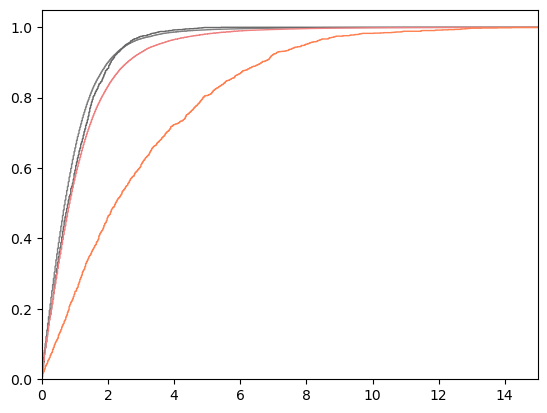

In [84]:
fig,ax = plt.subplots()
ax = plt.hist( x= (atr_score_lf.loc[atr_score_lf['tip60'] == True].loc[atr_score_lf['gimap'] == 'atr']['score'],
                   atr_score_lf.loc[atr_score_lf['tip60'] == False].loc[atr_score_lf['gimap'] == 'atr']['score'],
                   atr_score_lf.loc[atr_score_lf['tip60'] == True].loc[atr_score_lf['gimap'] == 'dmso']['score'],
                   atr_score_lf.loc[atr_score_lf['tip60'] == False].loc[atr_score_lf['gimap'] == 'dmso']['score']),
              density = True,
              bins = 1000,
              cumulative = True,
              histtype='step',
              color = ['coral','lightcoral','dimgray','gray']
             )
plt.xlim(0,15)

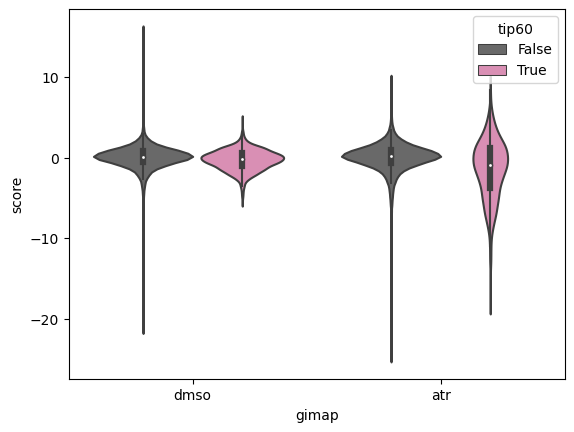

In [21]:
fig,ax = plt.subplots()
ax = sns.violinplot(data = atr_score_lf, x = 'gimap', y = 'score',
               hue = 'tip60',
               palette = ['dimgray','hotpink'],
               saturation = 0.5,
                 #   split = True
              )

In [28]:
atr_score_lf.loc[atr_score_lf['tip60'] == True].loc[atr_score_lf['gimap'] == 'atr']['score']

H2AFX:EP400_atr     3.069703
H2AFX:MEAF6_atr     0.137051
H2AFX:BRD8_atr      1.613702
H2AFX:DMAP1_atr     1.927408
H2AFX:TRRAP_atr     2.819251
                      ...   
TRRAP:IER5_atr      0.566024
TRRAP:HECTD1_atr   -2.524657
TRRAP:CCNF_atr      8.114043
TRRAP:LSM10_atr    -2.445154
TRRAP:ALKBH8_atr   -2.882763
Name: score, Length: 1505, dtype: float64

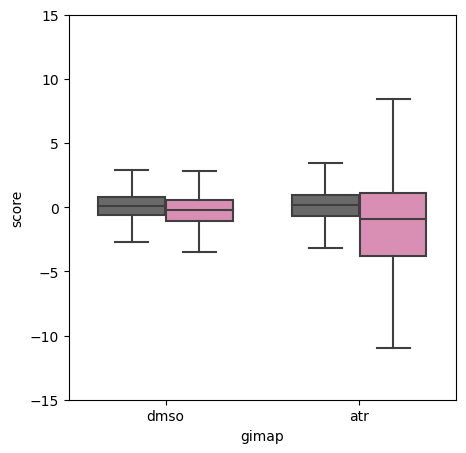

In [40]:
fig,ax = plt.subplots(figsize = (5,5))
ax = sns.boxplot(data = atr_score_lf, x = 'gimap', y = 'score',
               hue = 'tip60',
               palette = ['dimgray','hotpink'],
               saturation = 0.5,
               dodge = True,
                 width = 0.7,
                 showfliers = False
              )
ax.set_ylim(-15,15)
ax.legend().set_visible(False)
#ax.set(yscale='log')
plt.savefig('/Users/benh/Desktop/for_figs/tip60_bar.png',dpi=300)



In [310]:
tip60_genes = ['DMAP1','EP400','TRRAP','BRD8','MRGBP','MEAF6']
tip60_thresh_count = 0
all_count = 0
for i in range(len(atr_di_map.index)):
    for j in range(i+1,len(atr_di_map.index)):
        g1 = atr_map.index[i]
        g2 = atr_map.index[j] 
        if g1 in tip60_genes or g2 in tip60_genes:
            if abs(atr_di_map.loc[g1,g2]) > atr_di_thresh:
                tip60_thresh_count += 1
        if abs(atr_di_map.loc[g1,g2]) > atr_di_thresh:
            all_count += 1

In [312]:
#tip60_thresh_count
all_count


665